<a href="https://colab.research.google.com/github/mohak1/machine-learning-labs/blob/main/ml_practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###2. Using Linear Regression from sklearn

the MSE of the linear model is [7.56484826]


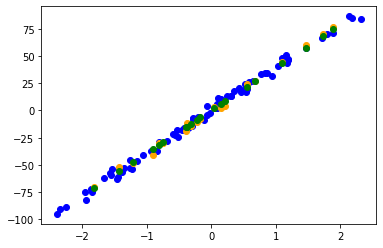

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#generate linearly predictable data using sklearn make regression
X,Y = make_regression(n_samples=100, n_features=1, noise=3)

#create a linear model
linear_model = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

#training the linear regression model
linear_model.fit(x_train, y_train)

#testing the performance of the trained model
error = 0
for i,data in enumerate(x_test):
  data = np.reshape(data, (-1,1))
  prediction = linear_model.predict(data)
  #mean squared error
  error += (prediction - y_test[i])**2
print(f'the MSE of the linear model is {error/len(x_test)}')

#plot the training & test set 
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='orange')
plt.scatter(x_test, linear_model.predict(np.reshape(x_test,(-1,1))), color='green')
plt.show()

###3. and 4. Gradient Descent without sklearn (single and multivariate)

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np

#generate single feature data
X,Y = make_regression(n_samples=100, n_features=1, noise=3)

#split data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [ ]:
#define a model
class my_regression_model:

  def __init__(self, n_features=1):
    #features=the no of features in the data
    #create a dictionary to handle multiple weight vectors (when there are more features)
    self.weight = {}
    for i in range(n_features+1):
      #name of this weight
      weight_name = 'w'+str(i)
      #add it to the weight dictionary and initialise it to zero (its a scalar)
      self.weight[weight_name] = 0.0 
    #print('self.weights at the end of init: ',self.weight)
      

  def model_output(self, feature):
    #the model is of the form: w0 + w1x1 + w2x2 + ... + wnxn
    no_of_weights = len(self.weight)
    output_val = 0
    for i in range(no_of_weights):
      weight_name = 'w'+str(i)
      if(weight_name=='w0'):
        continue
      weight = self.weight[weight_name]
      #output_val = w1x1 + w2x2 + ... + wnxn
      #print('value of i-1', i-1)
      #print('value of feature: ', feature)
      output_val += weight*feature[0][i-1]
    #add w0 now
    output_val += self.weight['w0']
    return output_val


  def update_weights(self, error, learning_rate, feature):
    #for w0, update does not involve xi
    no_of_weights = len(self.weight)
    for i in range(no_of_weights):
      weight_name = 'w'+str(i)
      if(weight_name=='w0'):
        self.weight[weight_name] += learning_rate*error
      else:
        self.weight[weight_name] += learning_rate*error*feature[i-1]


  def train(self, train_x, train_y, batch_size=1, epochs=50, learning_rate=0.001):
    for _ in range(epochs):
      error=0
      for i,x in enumerate(train_x):
        #model output
        x = np.reshape(x,(-1,len(x)))
        output = self.model_output(x)
        #accumulate the error  
        error += train_y[i]-output
        #forward pass until batch size, then back prop
        if(i%batch_size==0):
          self.update_weights(error, learning_rate, train_x[i])
          error=0

  def test(self, test_x, test_y):
    mse_error = 0
    #returns the list of model outputs for the entire input
    for i,x in enumerate(test_x):
      #model output
      x = np.reshape(x,(-1,len(x)))
      output = self.model_output(x)
      mse_error += (output-test_y[i])**2
    mse_error = mse_error/len(test_x)
    return mse_error 

In [ ]:
#using this model
model = my_regression_model(n_features=1)
model.train(x_train, y_train, batch_size=1, epochs=200, learning_rate=0.001)
mse_error = model.test(x_test, y_test)
print('Batch Size = 1; The mean squared error is: ', mse_error)

model = my_regression_model(n_features=1)
model.train(x_train, y_train, batch_size=2, epochs=500, learning_rate=0.01)
mse_error = model.test(x_test, y_test)
print('Batch Size = 2; The mean squared error is: ', mse_error)

model = my_regression_model(n_features=1)
model.train(x_train, y_train, batch_size=3, epochs=115, learning_rate=0.01)
mse_error = model.test(x_test, y_test)
print('Batch Size = 3; The mean squared error is: ', mse_error)

model = my_regression_model(n_features=1)
model.train(x_train, y_train, batch_size=4, epochs=115, learning_rate=0.01)
mse_error = model.test(x_test, y_test)
print('Batch Size = 4; The mean squared error is: ', mse_error)

#works as good as sklearn regression model!

Batch Size = 1; The mean squared error is:  13.070988993490605
Batch Size = 2; The mean squared error is:  15.272330463146375
Batch Size = 3; The mean squared error is:  13.01746524244469
Batch Size = 4; The mean squared error is:  10.3882608716435


###Multivariate Linear Regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np

#generate single feature data
X,Y = make_regression(n_samples=100, n_features=3, noise=3)

#split data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

#using this model
model = my_regression_model(n_features=3)
model.train(x_train, y_train, batch_size=1, epochs=100, learning_rate=0.01)
mse_error = model.test(x_test, y_test)
print('Batch Size = 1; The mean squared error is: ', mse_error)

model = my_regression_model(n_features=3)
model.train(x_train, y_train, batch_size=2, epochs=150, learning_rate=0.01)
mse_error = model.test(x_test, y_test)
print('Batch Size = 2; The mean squared error is: ', mse_error)

model = my_regression_model(n_features=3)
model.train(x_train, y_train, batch_size=3, epochs=300, learning_rate=0.01)
mse_error = model.test(x_test, y_test)
print('Batch Size = 3; The mean squared error is: ', mse_error)

model = my_regression_model(n_features=3)
model.train(x_train, y_train, batch_size=4, epochs=390, learning_rate=0.01)
mse_error = model.test(x_test, y_test)
print('Batch Size = 4; The mean squared error is: ', mse_error)

Batch Size = 1; The mean squared error is:  9.430947342993719
Batch Size = 2; The mean squared error is:  9.597211738217364
Batch Size = 3; The mean squared error is:  20.86717801689047
Batch Size = 4; The mean squared error is:  7.086688653590917e+18


###5. More: Ensemble of trees

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statistics import mode

bc = load_breast_cancer()
X = bc.data
Y = bc.target
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0)

#train 5 trees and ensemble them
tree1 = DecisionTreeClassifier().fit(x_train,y_train)
score1 = tree1.score(x_test, y_test)

tree2 = DecisionTreeClassifier().fit(x_train,y_train)
score2 = tree2.score(x_test, y_test)

tree3 = DecisionTreeClassifier().fit(x_train,y_train)
score3 = tree3.score(x_test, y_test)

tree4 = DecisionTreeClassifier().fit(x_train,y_train)
score4 = tree4.score(x_test, y_test)

tree5 = DecisionTreeClassifier().fit(x_train,y_train)
score5 = tree5.score(x_test, y_test)

print('individual score of the trees are: ',score1,score2,score3,score4,score5)

#ensemble
outs = []
final_output = []
for i, x in enumerate(x_test):
  x = np.reshape(x, (1,-1))
  outs.append(tree1.predict(x)[0])
  outs.append(tree2.predict(x)[0])
  outs.append(tree3.predict(x)[0])
  outs.append(tree4.predict(x)[0])
  outs.append(tree5.predict(x)[0])
  mode_output = mode(outs)
  final_output.append(mode_output)
  outs = []

#get the score of the ensemble model
correct = 0
for i in range(len(x_test)):
  if(final_output[i]==y_test[i]):
    correct += 1
accuracy = (correct/len(x_test))*100
print('score of the ensemble tree', accuracy)

individual score of the trees are:  0.8947368421052632 0.9122807017543859 0.9122807017543859 0.9035087719298246 0.9035087719298246
score of the ensemble tree 90.35087719298247
